In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Faz este append para poder importar o fitness_function que está na pasta acima
sys.path.append('../')
sys.path.append('../model')

from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from itertools import product
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid


In [2]:
# Load the data
def read_json_file(path):
    with open(path, 'r') as f:
        list_dict_alg = json.load(f)
    return list_dict_alg

path = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/depso_best_model_2.json'
dict_alg = read_json_file(path)


In [3]:

def filter_limits(dict_alg, limit_fitness_calls, exec_time_limit):


    # Encontra o indice do melhor indivíduo dentro dos limites estabelecidos

    print(dict_alg['best_ind_list'])
    best_ind_list = np.array(dict_alg['best_ind_list'])
    avg_ind_list = np.array(dict_alg['avg_ind_list'])
    fitness_calls_list = np.array(dict_alg['fitness_calls'])
    exec_time_list = np.array(dict_alg['exec_time_list'])
    total_time = dict_alg['total_time']

    mask = (fitness_calls_list <= limit_fitness_calls) & (exec_time_list <= exec_time_limit)

    best_ind_list = best_ind_list[mask]
    avg_ind_list = avg_ind_list[mask]
    fitness_calls_list = fitness_calls_list[mask]
    exec_time_list = exec_time_list[mask]

    #print(best_ind_list.shape)

    # Cria o dataframe
    df = pd.DataFrame(data={'best_ind': best_ind_list, 'avg_fitness': avg_ind_list, 'fitness_calls': fitness_calls_list, 'exec_time': exec_time_list})
    df['total_time'] = total_time

    # Encontra o melhor fitness do best_ind e seu respectivo fitness médio e adiciona as listas
    melhor_fitness = df['best_ind'].max()
    fitness_medio = df[df['best_ind'] == melhor_fitness]['avg_fitness'].values[0]

    
    return df

df = filter_limits(dict_alg[0], np.inf, np.inf)
    

[0.6330711919180216, 0.5649939606522533, 0.6061152676148657, 0.5923212274404077, 0.6113168796907804, 0.6249636760761894, 0.6190089724093989, 0.6303525245485939, 0.6314399897317775, 0.6332824246697798, 0.6372093146169715, 0.6406182003291325, 0.6434800262486016, 0.6457872749080558, 0.6452534234881031, 0.646460562547258, 0.6472421174132494, 0.6479036650517785, 0.6473089648045569, 0.6483901123130744, 0.6483050984609189, 0.6488085727531663, 0.6491887454049903, 0.6491934746319761, 0.6492141410408998, 0.6492358400000952, 0.6492922572989721, 0.6492950902957184, 0.6493761043324668, 0.6493194141590645, 0.6493767811176478, 0.6493722423178809, 0.6494120445571498, 0.6495134555626099, 0.6496200157863434, 0.6497332486495278, 0.5, 0.6497346959711775, 0.649720707819767, 0.6496816051214949, 0.6497221810893996, 0.6497513273593067, 0.6497519700633521, 0.6497600010507724, 0.6497523207080078, 0.6497669864536902, 0.6497832485258191, 0.6497797137765884, 0.6497810639156858, 0.649767942191542, 0.649778827595319

In [4]:
df = df.loc[df['best_ind'] > 0]
# Cria uma coluna "best_known" com o melhor fitness conhecido, que é um max() cumulativo
df['best_known'] = df['best_ind'].cummax()
# encontra o melhor individuo
best_ind = df['best_ind'].max()
print(best_ind)
# Encontra o número de chamadas de fintess em que o best_ind ocorre a primeira vez
fitness_calls = df.loc[df['best_ind'] == best_ind]['fitness_calls'].values[0]
print( fitness_calls )
# Encontra o índice da linha em que o best_ind ocorre a primeira vez
index = df.loc[df['best_ind'] == best_ind].index[0]


0.6498114960664148
3069.0


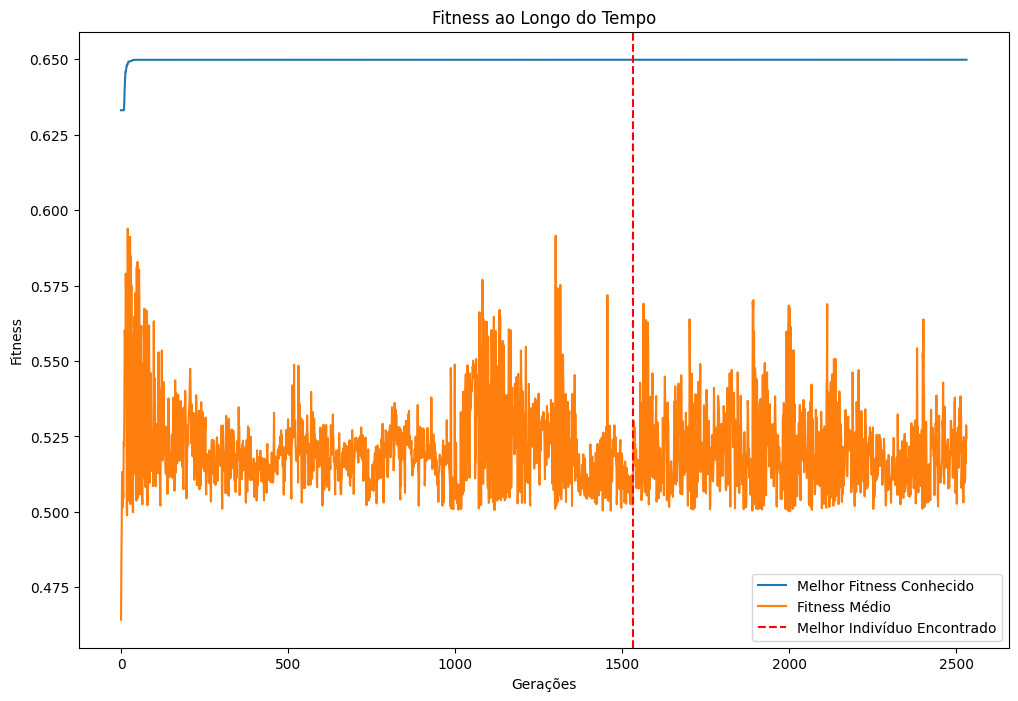

In [5]:
# Faz a visualização do gráfico de treinamento do modelo atraés do dataframe df
# mostrando o best_ind e o avg_fitness ao longo do tempo
plt.figure(figsize=(12, 8))
plt.plot(df['best_known'], label='Melhor Fitness Conhecido')
plt.plot(df['avg_fitness'], label='Fitness Médio')
plt.axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
plt.title('Fitness ao Longo do Tempo')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.show()

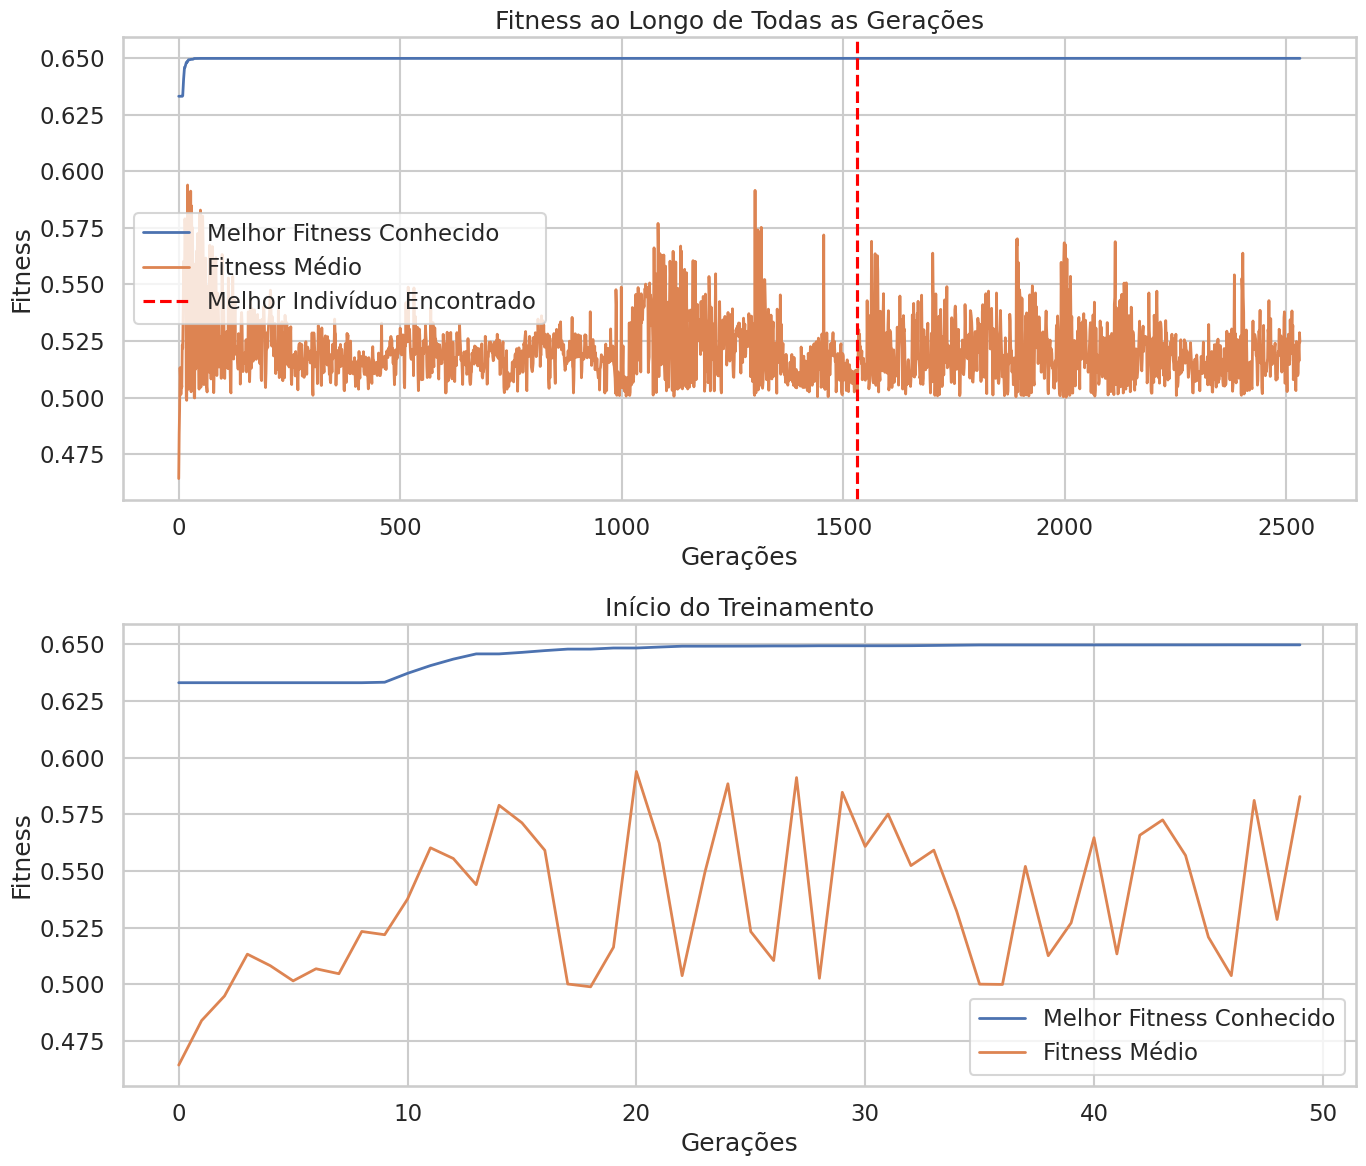

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Exemplo de como carregar o DataFrame

sns.set_theme(context='talk', style='whitegrid') # Configura o tema com Seaborn para um look mais acadêmico

fig, axes = plt.subplots(2, 1, figsize=(14, 12)) # Cria uma figura com duas subfiguras (subplots)

# Plot para o treinamento completo
axes[0].plot(df['best_known'], label='Melhor Fitness Conhecido', linewidth=2)
axes[0].plot(df['avg_fitness'], label='Fitness Médio', linewidth=2)
axes[0].axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
axes[0].set_title('Fitness ao Longo de Todas as Gerações')
axes[0].set_xlabel('Gerações')
axes[0].set_ylabel('Fitness')
axes[0].legend()

# Plot para visualizar apenas o início do treinamento
inicio_treinamento = 50 # Ajuste este valor para quantas gerações você quer visualizar no começo
axes[1].plot(df['best_known'][:inicio_treinamento], label='Melhor Fitness Conhecido', linewidth=2)
axes[1].plot(df['avg_fitness'][:inicio_treinamento], label='Fitness Médio', linewidth=2)
#axes[1].axvline(index if index < inicio_treinamento else -1, color='red', linestyle='--', label='Melhor Indivíduo Encontrado' if index < inicio_treinamento else '')
axes[1].set_title('Início do Treinamento')
axes[1].set_xlabel('Gerações')
axes[1].set_ylabel('Fitness')
axes[1].legend()

plt.tight_layout() # Ajusta automaticamente os subplots para que caibam na figura
plt.show()


In [22]:
# Printa a geracao em que o melhor individuo foi encontrado 
print(f"Melhor individuo encontrado na geração {index}")
print(f"Melhor individuo: {best_ind}")
print(f"Fitness calls: {fitness_calls}")
print(f"Tempo de execução: {df['exec_time'][index]}")
print(f"Tempo total de execução: {df['total_time']}")
# printa o número total de geracoes
print(f"Total de gerações: {len(df)}")



Melhor individuo encontrado na geração 1532
Melhor individuo: 0.6498114960664148
Fitness calls: 3069.0
Tempo de execução: 3272.511894464493
Tempo total de execução: 0       5420.908427
1       5420.908427
2       5420.908427
3       5420.908427
4       5420.908427
           ...     
2527    5420.908427
2528    5420.908427
2529    5420.908427
2530    5420.908427
2531    5420.908427
Name: total_time, Length: 2532, dtype: float64
Total de gerações: 2532


In [7]:
dict_alg[0]['best_solutions']
# Encontra a best_solution que está associada ao mesmo número de chamadas de fitness
best_solution = len(dict_alg[0]['best_solutions'])
print(best_solution)

1000


In [8]:
rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(100,10)
fitness_func_class = rocket_fitness.calc_fitness


In [9]:
fitness_val  = fitness_func_class(np.array(dict_alg[0]['best_solutions']))


In [10]:
best_ind_space = np.array(dict_alg[0]['best_solutions'][fitness_val.argmax()])
print(best_ind_space)
print(fitness_val.argmax())

[0.97633132 0.83419179 0.         1.         0.39867595 0.56351108
 0.         0.13788433 0.13465357 0.35813027]
238


In [11]:
print(fitness_val.max())

0.6498114960664148


In [23]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = best_ind_space * (max_mat - min_mat) + min_mat
print(best_sol_denorm)
# Printa o que é cada valor
print("Comb Pressure (Superior): ", best_sol_denorm[0])
print("MR (Superior): ", best_sol_denorm[1])
print("nozzle Diam (Superior): ", best_sol_denorm[2])
print("eps (Superior): ", best_sol_denorm[3])
print("Comb Pressure (Inferior): ", best_sol_denorm[4])
print("MR (Inferior): ", best_sol_denorm[5])
print("nozzle Diam (Inferior): ", best_sol_denorm[6])
print("eps (Inferior): ", best_sol_denorm[7])
print("Raio (Superior): ", best_sol_denorm[8])
print("Raio (Inferior): ", best_sol_denorm[9])

[1.18816566e+07 2.96786851e+00 2.00000000e-01 2.00000000e+02
 8.99337976e+06 2.58891551e+00 2.00000000e-01 1.13761345e+01
 1.90396070e+00 2.57439081e+00]
Comb Pressure (Superior):  11881656.594741607
MR (Superior):  2.9678685126776965
nozzle Diam (Superior):  0.2
eps (Superior):  199.99999999995148
Comb Pressure (Inferior):  8993379.759141477
MR (Inferior):  2.5889155117696436
nozzle Diam (Inferior):  0.2
eps (Inferior):  11.376134500959902
Raio (Superior):  1.9039607019948686
Raio (Inferior):  2.5743908110655296


In [13]:

import numpy as np
from model.build_rocket import RocketModel
import sys, os
import math
import concurrent.futures
import timeit
import multiprocessing
from functools import partial
import joblib
import time
from rocketcea.cea_obj_w_units import CEA_Obj


reg_path = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/improve_exec_speed/data/DecisionTreeRegressor_score_1.0.joblib'
reg_model = joblib.load(reg_path)
reg_model = False
cea_obj = ceaObj = CEA_Obj( oxName='LOX', fuelName='RP-1', pressure_units='Pa', cstar_units='m/s', temperature_units='K')


def fitness_func(parameters_list):
    #parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 4850,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=9000,
                               deltaV_landing=2000,
                               deltaV_firstStage=3000,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=9,
                               reg_model=reg_model,
                               cea_obj=cea_obj,
                               bound_values=bound_values)

    rocket_model.build_all()
    glow = rocket_model.glow
    rocket_model.print_all_parameters()

fitness_func(best_sol_denorm)


***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 39.67420627759024 [kg]
Total Payload Fairing Mass: 1613.9800030039232 [kg]
Electronic Mass: 415.53222164301263 [kg]
Power Mass: 96.59877556535115 [kg]
Total Payload Mass: 6976.111000212287 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 385.60819862401905
Isp Sea (s): 270.47342600869126
Mass flow (kg/s): 210.52336221399617
Thrust Vac (kN): 787.4541392251662
Thrust Sea (kN): 159.13560850736013
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 2.880775337540233 [m]
Fuel Tank Cylyndrical Height: 4.02623848492233e-11 [m]
Ox Tank Volume: 61.71862006114754 [m3]
Fuel Tank Volume: 28.910962477089804 [m3]
Intertank Structure Mass: 887.348852735379 [kg]
Separation Explosives Mass: 6.06921657018469 [kg]
Tank Fairing Mass: 555.1432747905696 [kg]
Total Stage Height: 14.65731912735877 [m]
Total Stage Dry Mass: 2709.6301817611607 [kg]
Total Stage Surface Area: 160.9578286276114

In [14]:
best_solution

1000

In [15]:
# Faz a visualização do gráfico de treinamento 

In [16]:
best_sol_denorm

array([1.18816566e+07, 2.96786851e+00, 2.00000000e-01, 2.00000000e+02,
       8.99337976e+06, 2.58891551e+00, 2.00000000e-01, 1.13761345e+01,
       1.90396070e+00, 2.57439081e+00])

In [17]:
bound_values

array([[7.0e+06, 1.2e+07],
       [1.8e+00, 3.2e+00],
       [2.0e-01, 3.0e-01],
       [3.0e+01, 2.0e+02],
       [7.0e+06, 1.2e+07],
       [1.8e+00, 3.2e+00],
       [2.0e-01, 3.0e-01],
       [2.0e+00, 7.0e+01],
       [1.5e+00, 4.5e+00],
       [1.5e+00, 4.5e+00]])